In [636]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [637]:
FILE_PATH = 'Dataset/Covid.csv'

In [638]:
df=pd.read_csv(FILE_PATH, index_col=0, header=0)
df = df.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0)
df.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
#,,,,,,,,,,
1,98166904,1084282.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
2,44587307,528629.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
3,35342950,155078.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
4,34706757,686027.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
5,33312373,149948.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07


In [639]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example box plot for a specific column (replace 'Total Deaths' with your column name)



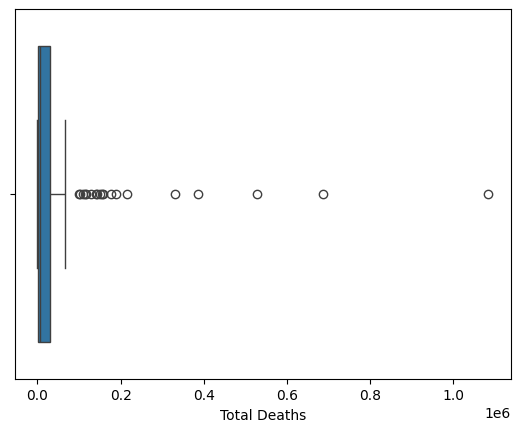

In [640]:
sns.boxplot(x=df['Total Deaths'])
plt.show()

<Axes: xlabel='Total Deaths', ylabel='Total Cases'>

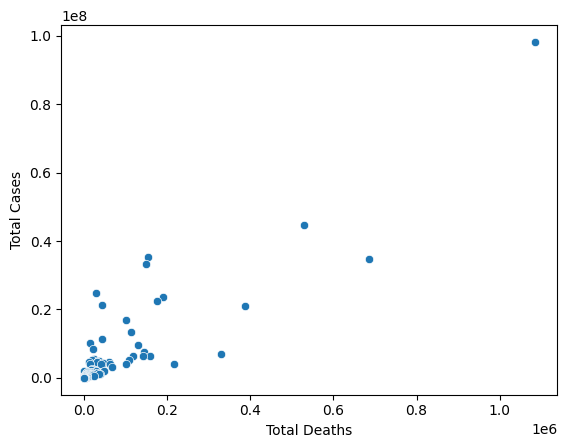

In [641]:
sns.scatterplot(x=df['Total Deaths'], y=df['Total Cases'])

In [642]:
# # Calculate IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove rows with outliers based on IQR
df  = df[~((df < (Q1 - IQR)) | (df > (Q3 + IQR))).any(axis=1)]


In [643]:
df.corr()

,Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
Total Cases,1.000000,0.822967,0.999882,0.474766,0.406430,0.423394,0.393519,0.841951,0.370289,0.095345
Total Deaths,0.822967,1.000000,0.821056,0.376162,0.273679,0.182330,0.462938,0.694871,0.137405,0.242999
Total Recovered,0.999882,0.821056,1.000000,0.461583,0.407945,0.420435,0.389468,0.842810,0.369141,0.095277
Active Cases,0.474766,0.376162,0.461583,1.000000,0.124090,0.433658,0.369405,0.342878,0.303156,-0.012964
"Serious, Critical",0.406430,0.273679,0.407945,0.124090,1.000000,0.093745,0.051751,0.335398,0.030118,0.041087
Tot Cases/ 1M pop,0.423394,0.182330,0.420435,0.433658,0.093745,1.000000,0.592155,0.257104,0.765504,-0.475589
Deaths/ 1M pop,0.393519,0.462938,0.389468,0.369405,0.051751,0.592155,1.000000,0.223668,0.412526,-0.392156
Total Tests,0.841951,0.694871,0.842810,0.342878,0.335398,0.257104,0.223668,1.000000,0.406558,0.207005
Tests/ 1M pop,0.370289,0.137405,0.369141,0.303156,0.030118,0.765504,0.412526,0.406558,1.000000,-0.413322
Population,0.095345,0.242999,0.095277,-0.012964,0.041087,-0.475589,-0.392156,0.207005,-0.413322,1.000000


In [644]:
columns_to_drop = ["Tests/ 1M pop", "Tot Cases/ 1M pop", "Population", "Serious, Critical", "Active Cases"]
df = df.drop(columns_to_drop, axis=1)

In [645]:
X = df.drop('Total Deaths', axis=1)  # Features
y = df['Total Deaths']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [646]:
ridge_model = Ridge(alpha=0.1)
ridge_model = ridge_model.fit(X_train, y_train)


In [647]:
lasso_model = Lasso(alpha=0.1)
lasso_model = lasso_model.fit(X_train, y_train)


c:\Users\Pratham\Desktop\dir\Academics\MA515\Project\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.252e+08, tolerance: 2.922e+05
  model = cd_fast.enet_coordinate_descent(


In [648]:
pca = PCA(n_components=3)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

ridge_model_pca = LinearRegression()
ridge_model_pca = ridge_model_pca.fit(X_train_pca, y_train)

ridge_model_pca.score(X_test_pca, y_test)

0.6025793212163879

In [649]:
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, ridge_predictions)
mse_lasso = mean_squared_error(y_test, lasso_predictions)

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'Mean Squared Error (Lasso): {mse_lasso}')


Mean Squared Error (Ridge): 21316821.465454873
Mean Squared Error (Lasso): 19513484.881408554


In [650]:
lasso_model.score(X_test, y_test)

0.6703883599297924